In [1]:
import pandas as pd
df = pd.read_csv('df_comp16.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
df.head()

,Unnamed: 0,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
0,0,W Blaine Luetkemeyer,House,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-01-28,-2500.0,Republican,Incumbent
1,1,Jason Chaffetz,House,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-03-02,1000.0,Republican,Incumbent
2,2,Gerry Connolly,House,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-03-02,2500.0,Democratic,Incumbent
3,3,Kevin W Yoder,House,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-03-02,2000.0,Republican,Incumbent
4,4,Emanuel Cleaver,House,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-05-15,1500.0,Democratic,Incumbent


In [3]:
#Reduce to Senate
df = df[df['RecipientCommitteeType'].str.contains('Senate', case=False)]

In [4]:
df.head()

,Unnamed: 0,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
6,6,Orrin Hatch,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-05-15,1000.0,Republican,NaN
9,9,Roy Blunt,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-04-07,1000.0,Republican,Incumbent
14,14,Roy Blunt,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-11-30,1000.0,Republican,Incumbent
15,15,Tammy Baldwin,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-11-30,1000.0,Democratic,NaN
20,20,Ronald Harold Johnson,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2016-02-12,1000.0,Republican,Incumbent


In [5]:
#Break out the groups filtered by DonorCommitteeNameNormalized first. 
#Create features (columns) for each, then join to 2018 Spreadsheet of candidates
df['DonorCommitteeNameNormalized'].isna().sum()

676852

In [6]:
#Drop rows without value for DonorCommittee
df = df.dropna(subset=['DonorCommitteeNameNormalized'])
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
6,Orrin Hatch,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-05-15,1000.0,Republican,NaN
9,Roy Blunt,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-04-07,1000.0,Republican,Incumbent
14,Roy Blunt,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-11-30,1000.0,Republican,Incumbent
15,Tammy Baldwin,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-11-30,1000.0,Democratic,NaN
20,Ronald Harold Johnson,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2016-02-12,1000.0,Republican,Incumbent


In [19]:
df_koch = df[df['DonorCommitteeNameNormalized'].str.contains('koch', case=False)]
df_koch

,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
192763,John Isakson,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-02-19,5000.0,Republican,Incumbent
192766,Patrick Joseph Toomey,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-01-27,500.0,Republican,Incumbent
192767,Patrick Joseph Toomey,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-01-27,500.0,Republican,Incumbent
192790,Richard Shelby,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-04-23,2500.0,Republican,Incumbent
192799,Jerry Moran,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-03-03,1500.0,Republican,Incumbent
192831,Rob Portman,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-03-03,1000.0,Republican,Incumbent
192832,Rob Portman,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-03-18,4000.0,Republican,Incumbent
192833,Rob Portman,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-03-18,1000.0,Republican,Incumbent
192834,Rand Paul,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-03-25,5000.0,Republican,Incumbent
192835,Rand Paul,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-03-25,5000.0,Republican,Incumbent


In [20]:
df_koch['TransactionAmount'].sum()
#About 70% of all Congressional donations

201000.0

In [21]:
# get dataframe linking name to total donations by koch
namegroups = df_koch.groupby('RecipientCandidateNameNormalized')
df_koch_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)

In [22]:
# rename column
df_koch_Senate = df_koch_Senate.rename(index=str, columns={"TransactionAmount": "koch16"})
df_koch_Senate

,koch16
RecipientCandidateNameNormalized,
Todd Christopher Young,10000.0
Timothy Scott,10000.0
Roy Blunt,10000.0
Ronald Harold Johnson,9000.0
Rob Portman,10000.0
Richard Shelby,10000.0
Richard Burr,10000.0
Rand Paul,10000.0
Patrick Joseph Toomey,5500.0


In [24]:
df_koch_Senate['koch16'].sum()

201000.0

In [25]:
df_koch_Senate.shape

(24, 1)

In [7]:
df_senate = pd.read_excel('senate_env18.xlsx')
df_senate.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,Exxon16,koch16,MarPet16,MarOil16,EnTrans16,Occ16,Conoco16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,0,0,0,0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,8000,0,5000,6000,5000,4000,7400
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,0,0,0,0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,10000,10000,0,0,0,1500,0
4,Senate,AR,John Boozman,Republican,NaN,7,0,10000,10000,9000,1000,3000,3000,0


In [27]:
# check if senators appear more than once
(df_senate.RecipientCandidateNameNormalized.value_counts()>1).any()

False

In [28]:
result = pd.merge(df_senate, df_koch_Senate, how='left', on='RecipientCandidateNameNormalized')
result['koch16']=result['koch16'].fillna(0)
result.tail(51)

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,Exxon16,koch16
49,Senate,MS,Roger Wicker,Republican,Incumbent,7,0,0,0.0
50,Senate,MT,Jon Tester,Democratic,NaN,93,1000,0,0.0
51,Senate,MT,Steven Daines,Republican,NaN,14,0,0,0.0
52,Senate,NC,Richard Burr,Republican,NaN,14,0,10000,10000.0
53,Senate,NC,Thom R Tillis,Republican,NaN,7,0,0,0.0
54,Senate,ND,Heidi Heitkamp,Democratic,Incumbent,50,0,4000,0.0
55,Senate,ND,John Hoeven,Republican,NaN,7,0,10000,5000.0
56,Senate,NE,Benjamin E Sasse,Republican,NaN,14,0,0,0.0
57,Senate,NE,Debra S Fischer,Republican,Incumbent,7,0,5000,0.0
58,Senate,NH,Jeanne Shaheen,Democratic,NaN,93,500,0,0.0


In [29]:
result['koch16'].sum()
#About 80% of Koch's Senate donations in the 2016 cycle went towards candidates who won/ remained in Senate
#Notable losers were ...

177500.0

In [30]:
result['koch16'].where(result['koch16'] > 0).count()
#19 of the 24 candidates they donated to won/ remained in Senate

19

In [31]:
#MARATHON PETROLEUM
df_MarPet = df[df['DonorCommitteeNameNormalized'].str.contains('marathon petroleum', case=False)]
df_MarPet

,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
457551,John Isakson,Senate,Marathon Petroleum Corporation Employees Pac,Marathon Petroleum,MARATHON PETROLEUM CORPORATION EMPLOYEES POLIT...,0,Unknown,NaN,2015-06-12,5000.0,Republican,Incumbent
930446,James Paul Lankford,Senate,Marathon Petroleum Corporation Employees Pac,Marathon Petroleum,MARATHON PETROLEUM CORPORATION EMPLOYEES POLIT...,0,Unknown,NaN,2015-06-25,1000.0,Republican,Incumbent
956530,Mike Lee,Senate,Marathon Petroleum Corporation Employees Pac (...,Marathon Petroleum Corporation Employees Pac (...,MARATHON PETROLEUM CORPORATION EMPLOYEES POLIT...,0,Unknown,NaN,2016-06-09,2500.0,Republican,Incumbent
1125795,Roy Blunt,Senate,MARATHON PETROLEUM CORPORATION EMPLOYEES POLIT...,Marathon Petroleum,MARATHON PETROLEUM CORPORATION EMPLOYEES POLIT...,0,NaN,NaN,2015-03-09,2500.0,Republican,Incumbent
1125808,John Hoeven,Senate,MARATHON PETROLEUM CORPORATION EMPLOYEES POLIT...,Marathon Petroleum,MARATHON PETROLEUM CORPORATION EMPLOYEES POLIT...,0,NaN,NaN,2015-03-25,2500.0,Republican,Incumbent
1125812,Kelly A Ayotte,Senate,MARATHON PETROLEUM CORPORATION EMPLOYEES POLIT...,Marathon Petroleum,MARATHON PETROLEUM CORPORATION EMPLOYEES POLIT...,0,NaN,NaN,2015-03-25,2500.0,Republican,Incumbent
1125816,Richard Burr,Senate,MARATHON PETROLEUM CORPORATION EMPLOYEES POLIT...,Marathon Petroleum,MARATHON PETROLEUM CORPORATION EMPLOYEES POLIT...,0,NaN,NaN,2015-02-03,5000.0,Republican,Incumbent
1125818,Daniel R Coats,Senate,MARATHON PETROLEUM CORPORATION EMPLOYEES POLIT...,Marathon Petroleum,MARATHON PETROLEUM CORPORATION EMPLOYEES POLIT...,0,NaN,NaN,2015-02-26,2500.0,Republican,Incumbent
1125825,John Hoeven,Senate,MARATHON PETROLEUM CORPORATION EMPLOYEES POLIT...,Marathon Petroleum,MARATHON PETROLEUM CORPORATION EMPLOYEES POLIT...,0,NaN,NaN,2015-04-20,2500.0,Republican,Incumbent
1125827,John Isakson,Senate,MARATHON PETROLEUM CORPORATION EMPLOYEES POLIT...,Marathon Petroleum,MARATHON PETROLEUM CORPORATION EMPLOYEES POLIT...,0,NaN,NaN,2015-04-20,5000.0,Republican,Incumbent


In [32]:
df_MarPet['TransactionAmount'].sum()
#Marathon Petroleum donated about ..% of Congressional totals in 2016 cycle to Senate. About ..% of count

187000.0

In [33]:
# get dataframe linking name to total donations by the ACTBLUE
namegroups = df_MarPet.groupby('RecipientCandidateNameNormalized')
df_MarPet_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)

In [34]:
# rename column
df_MarPet_Senate = df_MarPet_Senate.rename(index=str, columns={"TransactionAmount": "MarPet16"})
df_MarPet_Senate

,MarPet16
RecipientCandidateNameNormalized,
Todd Christopher Young,10000.0
Timothy Scott,10000.0
Roy Blunt,10000.0
Ronald Harold Johnson,7500.0
Rob Portman,10000.0
Richard Burr,10000.0
Rand Paul,10000.0
Patrick Joseph Toomey,8000.0
Orrin Hatch,10000.0


In [35]:
df_MarPet_Senate['MarPet16'].sum()

187000.0

In [36]:
df_MarPet_Senate.shape

(25, 1)

In [37]:
result2 = pd.merge(result, df_MarPet_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['MarPet16']=result2['MarPet16'].fillna(0)
result2

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,Exxon16,koch16,MarPet16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,8000,0.0,5000.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,10000,10000.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,10000,10000.0,9000.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,5000,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,10000,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0.0,0.0


In [38]:
result2['MarPet16'].sum()
#A little over half of ACTBLUE's Senate donations in the 2016 cycle went towards successful candidates

172000.0

In [39]:
result2['MarPet16'].where(result2['MarPet16'] > 0).count()
#49 of the 86 candidates they donated to won/ remained in Senate

22

In [42]:
#MARATHON OIL
df_MarOil = df[df['DonorCommitteeNameNormalized'].str.contains('marathon oil', case=False)]
df_MarOil
print('Marathon Oil Total 2016 Senate donations: ', df_MarOil['TransactionAmount'].sum())
# get dataframe linking name to total donations by MarOil
namegroups = df_MarOil.groupby('RecipientCandidateNameNormalized')
df_MarOil_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_MarOil_Senate = df_MarOil_Senate.rename(index=str, columns={"TransactionAmount": "MarOil16"})
print('Checking Sums after grouping: ', df_MarOil_Senate['MarPet16'].sum())
print('Candidates MarOil donated to: ', df_MarOil_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_MarOil_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['MarOil16']=result2['MarOil16'].fillna(0)
result2

Marathon Oil Total 2016 Senate donations:  51500.0
Checking Sums after grouping:  187000.0
Candidates MarOil donated to:  (25, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,Exxon16,koch16,MarPet16,MarOil16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,8000,0.0,5000.0,6000.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,10000,10000.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,10000,10000.0,9000.0,1000.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,5000,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,10000,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0.0,0.0,0.0


In [44]:
print('Checking Sums after grouping: ', df_MarOil_Senate['MarOil16'].sum())
print('Candidates MarOil donated to: ', df_MarOil_Senate.shape)

Checking Sums after grouping:  51500.0
Candidates MarOil donated to:  (20, 1)


In [45]:
#ENERGY TRANSFER
df_EnTrans = df[df['DonorCommitteeNameNormalized'].str.contains('Energy Transfer', case=False)]
print('Energy Transfer Total 2016 Senate donations: ', df_EnTrans['TransactionAmount'].sum())
# get dataframe linking name to total donations by MarOil
namegroups = df_EnTrans.groupby('RecipientCandidateNameNormalized')
df_EnTrans_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_EnTrans_Senate = df_EnTrans_Senate.rename(index=str, columns={"TransactionAmount": "EnTrans16"})
print('Checking Sums after grouping: ', df_EnTrans_Senate['EnTrans16'].sum())
print('Candidates EnTrans donated to: ', df_EnTrans_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_EnTrans_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['EnTrans16']=result2['EnTrans16'].fillna(0)
result2

Energy Transfer Total 2016 Senate donations:  32500.0
Checking Sums after grouping:  32500.0
Candidates EnTrans donated to:  (10, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,Exxon16,koch16,MarPet16,MarOil16,EnTrans16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0.0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,8000,0.0,5000.0,6000.0,5000.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,10000,10000.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,10000,10000.0,9000.0,1000.0,3000.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,5000,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,10000,0.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0.0,0.0,0.0,0.0


In [46]:
#Exxon
df_Exxon = df[df['DonorCommitteeNameNormalized'].str.contains('exxon', case=False)]
print('Exxon Total 2016 Senate donations: ', df_Exxon['TransactionAmount'].sum())
# get dataframe linking name to total donations by MarOil
namegroups = df_Exxon.groupby('RecipientCandidateNameNormalized')
df_Exxon_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Exxon_Senate = df_Exxon_Senate.rename(index=str, columns={"TransactionAmount": "Exxon15"})
print('Checking Sums after grouping: ', df_Exxon_Senate['Exxon15'].sum())
print('Candidates Exxon donated to: ', df_Exxon_Senate.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Exxon_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Exxon15']=result2['Exxon15'].fillna(0)
result2

Exxon Total 2016 Senate donations:  298500.0
Checking Sums after grouping:  298500.0
Candidates Exxon donated to:  (38, 1)


KeyError: 'EnTrans15'

In [49]:
result2 = result2.drop(['Exxon15'], axis=1)
result2.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,Exxon16,koch16,MarPet16,MarOil16,EnTrans16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0.0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,8000,0.0,5000.0,6000.0,5000.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,10000,10000.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,10000,10000.0,9000.0,1000.0,3000.0


In [52]:
#Occidental
df_Occ = df[df['DonorCommitteeNameNormalized'].str.contains('occidental', case=False)]
print('Occidental Total 2016 Senate donations: ', df_Occ['TransactionAmount'].sum())
# get dataframe linking name to total donations by Occidental
namegroups = df_Occ.groupby('RecipientCandidateNameNormalized')
df_Occ_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Occ_Senate = df_Occ_Senate.rename(index=str, columns={"TransactionAmount": "Occ16"})
print('Checking Sums after grouping: ', df_Occ_Senate['Occ16'].sum())
print('Candidates Occidental donated to: ', df_Occ.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Occ_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Occ16']=result2['Occ16'].fillna(0)
result2

Occidental Total 2016 Senate donations:  69000.0
Checking Sums after grouping:  69000.0
Candidates Occidental donated to:  (52, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,Exxon16,koch16,MarPet16,MarOil16,EnTrans16,Occ16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0.0,0.0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,8000,0.0,5000.0,6000.0,5000.0,4000.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,10000,10000.0,0.0,0.0,0.0,1500.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,10000,10000.0,9000.0,1000.0,3000.0,3000.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,5000,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,10000,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0.0,0.0,0.0,0.0,0.0


In [53]:
#Conoco
df_Conoco = df[df['DonorCommitteeNameNormalized'].str.contains('conoco', case=False)]
print('ConocoPhillips Total 2016 Senate donations: ', df_Occ['TransactionAmount'].sum())
# get dataframe linking name to total donations by Conoco
namegroups = df_Conoco.groupby('RecipientCandidateNameNormalized')
df_Conoco_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Conoco_Senate = df_Conoco_Senate.rename(index=str, columns={"TransactionAmount": "Conoco16"})
print('Checking Sums after grouping: ', df_Conoco_Senate['Conoco16'].sum())
print('Candidates Conoco donated to: ', df_Conoco.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Conoco_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Conoco16']=result2['Conoco16'].fillna(0)
result2

ConocoPhillips Total 2016 Senate donations:  69000.0
Checking Sums after grouping:  110400.0
Candidates Conoco donated to:  (44, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,Exxon16,koch16,MarPet16,MarOil16,EnTrans16,Occ16,Conoco16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,8000,0.0,5000.0,6000.0,5000.0,4000.0,7400.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,10000,10000.0,0.0,0.0,0.0,1500.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,10000,10000.0,9000.0,1000.0,3000.0,3000.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,5000,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,10000,0.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
#PHILLIPS 66
df_PhilSix = df[df['DonorCommitteeNameNormalized'].str.contains('phillips 66', case=False)]
print('Phillips66 Total 2016 Senate donations: ', df_PhilSix['TransactionAmount'].sum())
# get dataframe linking name to total donations by Phillips66
namegroups = df_PhilSix.groupby('RecipientCandidateNameNormalized')
df_PhilSix_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_PhilSix_Senate = df_PhilSix_Senate.rename(index=str, columns={"TransactionAmount": "PhilSix16"})
print('Checking Sums after grouping: ', df_PhilSix_Senate['PhilSix16'].sum())
print('Candidates Phillips66 donated to: ', df_PhilSix.shape)
# merging with earlier spreadsheet
result2 = pd.merge(df_senate, df_PhilSix_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['PhilSix16']=result2['PhilSix16'].fillna(0)
result2

Phillips66 Total 2016 Senate donations:  56000.0
Checking Sums after grouping:  56000.0
Candidates Phillips66 donated to:  (32, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,Exxon16,koch16,MarPet16,MarOil16,EnTrans16,Occ16,Conoco16,PhilSix16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,0,0,0,0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,8000,0,5000,6000,5000,4000,7400,6500.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,0,0,0,0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,10000,10000,0,0,0,1500,0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,10000,10000,9000,1000,3000,3000,0,2000.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0,0,0,0,0,0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,5000,0,0,0,0,0,0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,10000,0,0,0,0,0,0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,0,0,0,0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,0,0,0,0,0.0


In [11]:
#VALERO
df_Valero = df[df['DonorCommitteeNameNormalized'].str.contains('valero', case=False)]
print('Valero Total 2016 Senate donations: ', df_Valero['TransactionAmount'].sum())
# get dataframe linking name to total donations by Valero
namegroups = df_Valero.groupby('RecipientCandidateNameNormalized')
df_Valero_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Valero_Senate = df_Valero_Senate.rename(index=str, columns={"TransactionAmount": "Valero16"})
print('Checking Sums after grouping: ', df_Valero_Senate['Valero16'].sum())
print('Candidates Valero donated to: ', df_Valero.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Valero_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Valero16']=result2['Valero16'].fillna(0)
result2

Valero Total 2016 Senate donations:  108500.0
Checking Sums after grouping:  108500.0
Candidates Valero donated to:  (28, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,Exxon16,koch16,MarPet16,MarOil16,EnTrans16,Occ16,Conoco16,PhilSix16,Valero16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,0,0,0,0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,8000,0,5000,6000,5000,4000,7400,6500.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,0,0,0,0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,10000,10000,0,0,0,1500,0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,10000,10000,9000,1000,3000,3000,0,2000.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0,0,0,0,0,0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,5000,0,0,0,0,0,0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,10000,0,0,0,0,0,0,0.0,2500.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,0,0,0,0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,0,0,0,0,0.0,0.0


In [12]:
result2.to_excel('senate_env18_16con.xlsx')

In [18]:
results2 = pd.read_excel('senate_env18_16con.xlsx')
results2

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,Exxon16,koch16,MarPet16,MarOil16,EnTrans16,Occ16,Conoco16,PhilSix16,Valero16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,0,0,0,0,0,0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,8000,0,5000,6000,5000,4000,7400,6500,0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,0,0,0,0,0,0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,10000,10000,0,0,0,1500,0,0,0
4,Senate,AR,John Boozman,Republican,NaN,7,0,10000,10000,9000,1000,3000,3000,0,2000,0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0,0,0,0,0,0,0,0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,5000,0,0,0,0,0,0,0,0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,10000,0,0,0,0,0,0,0,2500
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,0,0,0,0,0,0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,0,0,0,0,0,0


In [19]:
#ARCH COAL
df_Arch = df[df['DonorCommitteeNameNormalized'].str.contains('arch coal', case=False)]
print('Arch Coal Total 2016 Senate donations: ', df_Arch['TransactionAmount'].sum())
# get dataframe linking name to total donations by Arch
namegroups = df_Arch.groupby('RecipientCandidateNameNormalized')
df_Arch_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Arch_Senate = df_Arch_Senate.rename(index=str, columns={"TransactionAmount": "Arch16"})
print('Checking Sums after grouping: ', df_Arch_Senate['Arch16'].sum())
print('Candidates Arch Coal donated to: ', df_Arch.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Arch_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Arch16']=result2['Arch16'].fillna(0)
result2

Arch Coal Total 2016 Senate donations:  65700.0
Checking Sums after grouping:  65700.0
Candidates Arch Coal donated to:  (51, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,Exxon16,koch16,MarPet16,MarOil16,EnTrans16,Occ16,Conoco16,PhilSix16,Valero16,Arch16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,8000,0,5000,6000,5000,4000,7400,6500.0,0.0,8000.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,0,0,0,0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,10000,10000,0,0,0,1500,0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,10000,10000,9000,1000,3000,3000,0,2000.0,0.0,1000.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,5000,0,0,0,0,0,0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,10000,0,0,0,0,0,0,0.0,2500.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,0,0,0,0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,0,0,0,0,0.0,0.0,0.0


In [20]:
#CLOUD PEAK ENERGY
df_Cloud = df[df['DonorCommitteeNameNormalized'].str.contains('cloud peak energy', case=False)]
print('Cloud Peak Energy Total 2016 Senate donations: ', df_Cloud['TransactionAmount'].sum())
# get dataframe linking name to total donations by Cloud Peak Energy
namegroups = df_Cloud.groupby('RecipientCandidateNameNormalized')
df_Cloud_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Cloud_Senate = df_Cloud_Senate.rename(index=str, columns={"TransactionAmount": "Cloud16"})
print('Checking Sums after grouping: ', df_Cloud_Senate['Cloud16'].sum())
print('Candidates Cloud Peak Energy donated to: ', df_Cloud.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Cloud_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Cloud16']=result2['Cloud16'].fillna(0)
result2

Cloud Peak Energy Total 2016 Senate donations:  22600.0
Checking Sums after grouping:  22600.0
Candidates Cloud Peak Energy donated to:  (10, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,Exxon16,koch16,MarPet16,MarOil16,EnTrans16,Occ16,Conoco16,PhilSix16,Valero16,Arch16,Cloud16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,8000,0,5000,6000,5000,4000,7400,6500.0,0.0,8000.0,6000.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,10000,10000,0,0,0,1500,0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,10000,10000,9000,1000,3000,3000,0,2000.0,0.0,1000.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,5000,0,0,0,0,0,0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,10000,0,0,0,0,0,0,0.0,2500.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0


In [21]:
#DRUMMOND COMPANY
df_Drummond = df[df['DonorCommitteeNameNormalized'].str.contains('drummond company', case=False)]
print('Drummond Company Total 2016 Senate donations: ', df_Drummond['TransactionAmount'].sum())
# get dataframe linking name to total donations by Drummond
namegroups = df_Drummond.groupby('RecipientCandidateNameNormalized')
df_Drummond_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Drummond_Senate = df_Drummond_Senate.rename(index=str, columns={"TransactionAmount": "Drummond16"})
print('Checking Sums after grouping: ', df_Drummond_Senate['Drummond16'].sum())
print('Candidates Drummond donated to: ', df_Drummond.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Drummond_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Drummond16']=result2['Drummond16'].fillna(0)
result2

Drummond Company Total 2016 Senate donations:  10000.0
Checking Sums after grouping:  10000.0
Candidates Drummond donated to:  (5, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,Exxon16,koch16,MarPet16,MarOil16,EnTrans16,Occ16,Conoco16,PhilSix16,Valero16,Arch16,Cloud16,Drummond16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,8000,0,5000,6000,5000,4000,7400,6500.0,0.0,8000.0,6000.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,10000,10000,0,0,0,1500,0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,10000,10000,9000,1000,3000,3000,0,2000.0,0.0,1000.0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,5000,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,10000,0,0,0,0,0,0,0.0,2500.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [22]:
#LIGNITE ENERGY
df_Lignite = df[df['DonorCommitteeNameNormalized'].str.contains('lignite energy', case=False)]
print('Lignite Energy Total 2016 Senate donations: ', df_Lignite['TransactionAmount'].sum())
# get dataframe linking name to total donations by Lignite
namegroups = df_Lignite.groupby('RecipientCandidateNameNormalized')
df_Lignite_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Lignite_Senate = df_Lignite_Senate.rename(index=str, columns={"TransactionAmount": "Lignite16"})
print('Checking Sums after grouping: ', df_Lignite_Senate['Lignite16'].sum())
print('Candidates Lignite donated to: ', df_Lignite.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Lignite_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Lignite16']=result2['Lignite16'].fillna(0)
result2

Lignite Energy Total 2016 Senate donations:  5500.0
Checking Sums after grouping:  5500.0
Candidates Lignite donated to:  (3, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,Exxon16,koch16,MarPet16,MarOil16,EnTrans16,Occ16,Conoco16,PhilSix16,Valero16,Arch16,Cloud16,Drummond16,Lignite16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,8000,0,5000,6000,5000,4000,7400,6500.0,0.0,8000.0,6000.0,0.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,10000,10000,0,0,0,1500,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,10000,10000,9000,1000,3000,3000,0,2000.0,0.0,1000.0,0.0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,5000,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,10000,0,0,0,0,0,0,0.0,2500.0,0.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
#NORTH AMERICAN COAL'
df_NAcoal = df[df['DonorCommitteeNameNormalized'].str.contains('north american coal', case=False)]
print('North American Coal Corp Total 2016 Senate donations: ', df_NAcoal['TransactionAmount'].sum())
# get dataframe linking name to total donations by Lignite
namegroups = df_NAcoal.groupby('RecipientCandidateNameNormalized')
df_NAcoal_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_NAcoal_Senate = df_NAcoal_Senate.rename(index=str, columns={"TransactionAmount": "NAcoal16"})
print('Checking Sums after grouping: ', df_NAcoal_Senate['NAcoal16'].sum())
print('Candidates NA Coal donated to: ', df_NAcoal.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_NAcoal_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['NAcoal16']=result2['NAcoal16'].fillna(0)
result2

North American Coal Corp Total 2016 Senate donations:  7000.0
Checking Sums after grouping:  7000.0
Candidates NA Coal donated to:  (1, 1)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,Exxon16,koch16,MarPet16,...,EnTrans16,Occ16,Conoco16,PhilSix16,Valero16,Arch16,Cloud16,Drummond16,Lignite16,NAcoal16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,8000,0,5000,...,5000,4000,7400,6500.0,0.0,8000.0,6000.0,0.0,0.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,10000,10000,0,...,0,1500,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,10000,10000,9000,...,3000,3000,0,2000.0,0.0,1000.0,0.0,0.0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,5000,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,10000,0,0,...,0,0,0,0.0,2500.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#OHIO COAL'
df_OHcoal = df[df['DonorCommitteeNameNormalized'].str.contains('ohio coal', case=False)]
print('Ohio Coal Corp Total 2016 Senate donations: ', df_NAcoal['TransactionAmount'].sum())
# get dataframe linking name to total donations by Lignite
namegroups = df_OHcoal.groupby('RecipientCandidateNameNormalized')
df_OHcoal_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_OHcoal_Senate = df_OHcoal_Senate.rename(index=str, columns={"TransactionAmount": "OHcoal16"})
print('Checking Sums after grouping: ', df_OHcoal_Senate['OHcoal16'].sum())
print('Candidates OH Coal donated to: ', df_OHcoal.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_OHcoal_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['OHcoal16']=result2['OHcoal16'].fillna(0)
result2

Ohio Coal Corp Total 2016 Senate donations:  7000.0
Checking Sums after grouping:  5700.0
Candidates OH Coal donated to:  (3, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,Exxon16,koch16,MarPet16,...,Occ16,Conoco16,PhilSix16,Valero16,Arch16,Cloud16,Drummond16,Lignite16,NAcoal16,OHcoal16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,8000,0,5000,...,4000,7400,6500.0,0.0,8000.0,6000.0,0.0,0.0,0.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,10000,10000,0,...,1500,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,10000,10000,9000,...,3000,0,2000.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,5000,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,10000,0,0,...,0,0,0.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#PEABODY ENERGY'
df_Peabody = df[df['DonorCommitteeNameNormalized'].str.contains('peabody energy', case=False)]
print('Peabody Energy Total 2016 Senate donations: ', df_Peabody['TransactionAmount'].sum())
# get dataframe linking name to total donations by Peabody
namegroups = df_Peabody.groupby('RecipientCandidateNameNormalized')
df_Peabody_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Peabody_Senate = df_Peabody_Senate.rename(index=str, columns={"TransactionAmount": "Peabody16"})
print('Checking Sums after grouping: ', df_Peabody_Senate['Peabody16'].sum())
print('Candidates Peabody Energy donated to: ', df_Peabody.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Peabody_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Peabody16']=result2['Peabody16'].fillna(0)
result2

Peabody Energy Total 2016 Senate donations:  26000.0
Checking Sums after grouping:  26000.0
Candidates Peabody Energy donated to:  (19, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,Exxon16,koch16,MarPet16,...,Conoco16,PhilSix16,Valero16,Arch16,Cloud16,Drummond16,Lignite16,NAcoal16,OHcoal16,Peabody16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,8000,0,5000,...,7400,6500.0,0.0,8000.0,6000.0,0.0,0.0,0.0,0.0,7500.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,10000,10000,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,10000,10000,9000,...,0,2000.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,5000,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,10000,0,0,...,0,0.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#BARRICK GOLDSTRIKE MINES
df_Barrick = df[df['DonorCommitteeNameNormalized'].str.contains('barrick gold', case=False)]
print('Barrick Goldstrike Total 2016 Senate donations: ', df_Barrick['TransactionAmount'].sum())
# get dataframe linking name to total donations by Barrick
namegroups = df_Barrick.groupby('RecipientCandidateNameNormalized')
df_Barrick_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Barrick_Senate = df_Barrick_Senate.rename(index=str, columns={"TransactionAmount": "Barrick16"})
print('Checking Sums after grouping: ', df_Barrick_Senate['Barrick16'].sum())
print('Candidates Barrick Goldstrike donated to: ', df_Barrick.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Barrick_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Barrick16']=result2['Barrick16'].fillna(0)
result2

Barrick Goldstrike Total 2016 Senate donations:  51000.0
Checking Sums after grouping:  51000.0
Candidates Barrick Goldstrike donated to:  (21, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,Exxon16,koch16,MarPet16,...,PhilSix16,Valero16,Arch16,Cloud16,Drummond16,Lignite16,NAcoal16,OHcoal16,Peabody16,Barrick16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,8000,0,5000,...,6500.0,0.0,8000.0,6000.0,0.0,0.0,0.0,0.0,7500.0,1000.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,10000,10000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,10000,10000,9000,...,2000.0,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,5000,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,10000,0,0,...,0.0,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#CLEVELAND CLIFFS
df_Cliffs = df[df['DonorCommitteeNameNormalized'].str.contains('cliffs natural', case=False)]
print('Cleveland Cliffs Total 2016 Senate donations: ', df_Cliffs['TransactionAmount'].sum())
# get dataframe linking name to total donations by Cleveland Cliffs
namegroups = df_Cliffs.groupby('RecipientCandidateNameNormalized')
df_Cliffs_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Cliffs_Senate = df_Cliffs_Senate.rename(index=str, columns={"TransactionAmount": "Cliffs16"})
print('Checking Sums after grouping: ', df_Cliffs_Senate['Cliffs16'].sum())
print('Candidates Cleveland Cliffs donated to: ', df_Cliffs.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Cliffs_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Cliffs16']=result2['Cliffs16'].fillna(0)
result2

Cleveland Cliffs Total 2016 Senate donations:  14500.0
Checking Sums after grouping:  14500.0
Candidates Cleveland Cliffs donated to:  (8, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,Exxon16,koch16,MarPet16,...,Valero16,Arch16,Cloud16,Drummond16,Lignite16,NAcoal16,OHcoal16,Peabody16,Barrick16,Cliffs16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,8000,0,5000,...,0.0,8000.0,6000.0,0.0,0.0,0.0,0.0,7500.0,1000.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,10000,10000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,10000,10000,9000,...,0.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,5000,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2500.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,10000,0,0,...,2500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#NEWMONT MINING
df_Newmont = df[df['DonorCommitteeNameNormalized'].str.contains('newmont', case=False)]
print('Newmont Mining Total 2016 Senate donations: ', df_Newmont['TransactionAmount'].sum())
# get dataframe linking name to total donations by Newmont
namegroups = df_Newmont.groupby('RecipientCandidateNameNormalized')
df_Newmont_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)
# rename column
df_Newmont_Senate = df_Newmont_Senate.rename(index=str, columns={"TransactionAmount": "Newmont16"})
print('Checking Sums after grouping: ', df_Newmont_Senate['Newmont16'].sum())
print('Candidates Newmont donated to: ', df_Newmont.shape)
# merging with earlier spreadsheet
result2 = pd.merge(result2, df_Newmont_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['Newmont16']=result2['Newmont16'].fillna(0)
result2

Newmont Mining Total 2016 Senate donations:  14500.0
Checking Sums after grouping:  14500.0
Candidates Newmont donated to:  (11, 12)


,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,Exxon16,koch16,MarPet16,...,Arch16,Cloud16,Drummond16,Lignite16,NAcoal16,OHcoal16,Peabody16,Barrick16,Cliffs16,Newmont16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,8000,0,5000,...,8000.0,6000.0,0.0,0.0,0.0,0.0,7500.0,1000.0,0.0,3000.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,10000,10000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0,10000,10000,9000,...,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0,5000,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,2500.0,0.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0,10000,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
result2.to_excel('senate_env18_16con.xlsx')

In [34]:
result = pd.read_excel('pols_list_senate18.xlsx')
result

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score
0,Senate,AK,Dan Sullivan,Republican,NaN,7
1,Senate,AK,Lisa Murkowski,Republican,NaN,14
2,Senate,AL,Doug Jones,Democratic,NaN,79
3,Senate,AL,Richard Shelby,Republican,NaN,7
4,Senate,AR,John Boozman,Republican,NaN,7
5,Senate,AR,Thomas Cotton,Republican,NaN,0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7
7,Senate,AZ,John Mccain,Republican,NaN,0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93
9,Senate,CA,Kamala D Harris,Democratic,NaN,100


In [2]:
import pandas as pd 
df_env12 = pd.read_excel('senate_env12.xlsx')
df_env12.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score
0,Senate,AK,Lisa Murkowski,Republican,NaN,38
1,Senate,AK,Mark Begich,Democratic,NaN,77
2,Senate,AL,Jefferson Sessions,Republican,NaN,15
3,Senate,AL,Richard Shelby,Democratic,NaN,23
4,Senate,AR,John Boozman,Republican,NaN,15


In [3]:
df_env12[df_env12['RecipientCandidateParty'].str.contains('Independent', case=False)]

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score
40,Senate,ME,Angus Stanley King Jr,Independent,Open Seat,92
90,Senate,VT,Bernard Sanders,Independent,Open Seat,100


In [18]:
#df_env12(['RecipientCandidateParty']).str.replace('Independent', 'Democratic', regex=False)
df_env12 = df_env12.replace({'RecipientCandidateParty': 'Independent'}, 'Democratic')
df_env12.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score
0,Senate,AK,Lisa Murkowski,Republican,NaN,38
1,Senate,AK,Mark Begich,Democratic,NaN,77
2,Senate,AL,Jefferson Sessions,Republican,NaN,15
3,Senate,AL,Richard Shelby,Democratic,NaN,23
4,Senate,AR,John Boozman,Republican,NaN,15


In [55]:
df_env18 = pd.read_excel('senate_env18.xlsx')
df_env18.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,ACTBLUE16,ClubGrowth16,SenCons16,Koch16,Exxon16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,0,0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0,0,0,8000
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,0,0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0,0,10000,10000
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0,0,10000,10000


In [56]:
df_env18 = df_env18.replace({'RecipientCandidateParty': 'Independent'}, 'Democratic')
df_env18.nunique()

RecipientCandidateOffice              1
RecipientCandidateOfficeState        50
RecipientCandidateNameNormalized    100
RecipientCandidateParty               2
RecipientCandidateICO                 3
LCV_Score                            12
LeagueOfConservation16               17
ACTBLUE16                            50
ClubGrowth16                         14
SenCons16                             2
Koch16                                7
Exxon16                               8
dtype: int64

In [59]:
X12_Rep = [df_env12['LCV_Score'].values[df_env12['RecipientCandidateParty']=='Republican']]
len(X12_Rep[0])
X12_Rep = X12_Rep[0]

In [60]:
X12_Dem = [df_env12['LCV_Score'].values[df_env12['RecipientCandidateParty']=='Democratic']]
len(X12_Dem[0])
X12_Dem = X12_Dem[0]

In [61]:
X18_Rep = [df_env18['LCV_Score'].values[df_env18['RecipientCandidateParty']=='Republican']]
len(X18_Rep[0])
X18_Rep = X18_Rep[0]

In [62]:
X18_Dem = [df_env18['LCV_Score'].values[df_env18['RecipientCandidateParty']=='Democratic']]
len(X18_Dem[0])
X18_Dem = X18_Dem[0]

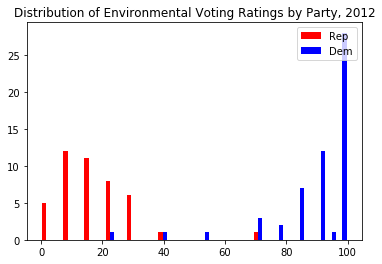

In [82]:
import numpy as np
import matplotlib.pyplot as plt
#plt.hist(X12_Rep, 20, density=True, facecolor='r', alpha=0.75)
#fig, ax = plt.subplots()
#ax.scatter(x, y, c=z, s=100, edgecolor='')
#pyplot.hist(x, bins, alpha=0.5, label='x')
#pyplot.hist(y, bins, alpha=0.5, label='y')
#pyplot.legend(loc='upper right')
#pyplot.show()
bins = np.linspace(0, 100, 30)
colors = ['r','b']
plt.hist([X12_Rep, X12_Dem], bins, color=colors, label=['Rep', 'Dem'])
plt.title('Distribution of Environmental Voting Ratings by Party, 2012')
plt.legend(loc='upper right')
plt.show()

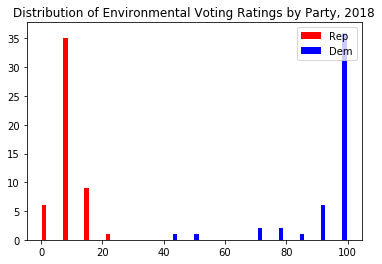

In [83]:
bins = np.linspace(0, 100, 30)
plt.hist([X18_Rep, X18_Dem], bins, color=colors, label=['Rep', 'Dem'])
plt.title('Distribution of Environmental Voting Ratings by Party, 2018')
plt.legend(loc='upper right')
plt.show()